![](1.png)

![](2.png)

![](3.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('Data_Train.xlsx')

In [3]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


### from the above we can see statistical distribution of our taget column and it means also that it is only column which has numerical data.

In [4]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### The head() method help us to see the first 5 records of our dataset.

In [5]:
print("**"*40)
print("**"*40)

********************************************************************************
********************************************************************************


## __From the above problem statement we are asked to build a model which can predict the flight ticket price. Since the outcome price is continous data we can assume that ,It is regression prblem.__

In [6]:
print("**"*40)
print("**"*40)

********************************************************************************
********************************************************************************


In [7]:
data.shape

(10683, 11)

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.reset_index(drop=True)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10458,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10459,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10460,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10461,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


### we can see that the duplicate records are removed

In [10]:
data.shape

(10463, 11)

### From the Shape method we can see the shape of our dataset which has 10463 records(rows) and 11 attributes (columns)

### From my personal analysis I think there columns : __"Destination","Source","Route","Arrival_Time","Dep_Time","Additional_Info"__ are not important, so let's delete them.

In [11]:
data.drop(["Destination","Source","Route","Arrival_Time","Dep_Time","Additional_Info"],axis=1,inplace=True)

In [12]:
data.shape

(10463, 5)

### Now we have 5 important columns left. let's make some cleaning.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10463 entries, 0 to 10682
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10463 non-null  object
 1   Date_of_Journey  10463 non-null  object
 2   Duration         10463 non-null  object
 3   Total_Stops      10462 non-null  object
 4   Price            10463 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 490.5+ KB


### From the info() method we can see some details about our dataset, like the "data type" (dtypes), the columns indexes and the "Non-Null Count". we can see that only __"Total_Stops"__ column of our dataset have missing values since non-null count less 10683.

In [14]:
## This will help us to see how is the shape of the data in each column.

for column in data.columns:
    print(data[column].value_counts())
    print('**'*20)

Jet Airways                          3700
IndiGo                               2043
Air India                            1695
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
****************************************
6/06/2019     490
18/05/2019    486
9/06/2019     485
12/06/2019    483
21/05/2019    482
9/05/2019     466
21/03/2019    412
15/05/2019    402
27/05/2019    369
27/06/2019    339
24/06/2019    330
1/06/2019     330
3/06/2019     326
15/06/2019    314
24/03/2019    314
6/03/2019     302
27/03/2019    290
24/05/2019    286
6/05/2019     282
1/05/2019     274
12/05/2019    259
1/04/2019     256
3/03/2019     217
9/03/2019    

### From the above code I can say that all the rest columns are importants.

In [15]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Duration           0
Total_Stops        1
Price              0
dtype: int64

### The above code show again clearly that there is only one missing value in the __"Total_Stops"__ column. and we will fill it by the mode.

In [16]:
## fill the missing values
data["Total_Stops"] = data["Total_Stops"].fillna('1 stop')

# __Data cleaning__

## 'Duration' let's split it and get the minutes and hours

In [17]:
data["Duration"].head(4)

0    2h 50m
1    7h 25m
2       19h
3    5h 25m
Name: Duration, dtype: object

In [18]:
items  = [x.split(' ') for x in data["Duration"]]

In [19]:
for x in items:
    if len(x) ==1:
        x.append('0m')

In [20]:
items[:5]

[['2h', '50m'], ['7h', '25m'], ['19h', '0m'], ['5h', '25m'], ['4h', '45m']]

In [21]:
## Now will seperate minutes and hours

Duration_hours = []
for x in items:
    Duration_hours.append(x[0])

In [22]:
## geting the minutes

Duration_minutes = []
for x in items:
    Duration_minutes.append(x[1])

In [23]:
Duration_hours[:5]

['2h', '7h', '19h', '5h', '4h']

In [24]:
Duration_minutes[:5]

['50m', '25m', '0m', '25m', '45m']

### Let's let's remove the character __'h' and "m"__ Using __regular expression__

In [25]:
## let's import regular expression

import re

In [26]:
## now let's remove the "h" and "m" characters

Hours = list()
for x in Duration_hours:
    Hours.append(re.sub("[h]","",x))

In [27]:
Minutes = list()
for x in Duration_minutes:
    Minutes.append(re.sub("[m]","",x))   

In [28]:
## checking the length

print(len(Hours),len(Minutes))

10463 10463


In [29]:
for x in Duration_hours:
    if 'm' in x:
        print(x)

5m


### we can see that is character "m" for on item. maybe someone did a mistake and put "m" in place of 'h', so let's solve

In [30]:
### This gives no output and it means the Duration_minutes contain only numbers

for x in Duration_minutes:
    if 'h' in x:
        print(x)

In [31]:
data['Duration_hours'] = Hours
data['Duration_minutes'] = Minutes

In [32]:
## let's solve the single "m" problem
data['Duration_hours'] =data['Duration_hours'].replace({'5m':5})

In [33]:
print(data.dtypes)

Airline             object
Date_of_Journey     object
Duration            object
Total_Stops         object
Price                int64
Duration_hours      object
Duration_minutes    object
dtype: object


### we can see that the two new columns 'Duration_hours' and 'Duration_minutes' still have object type so let's convert them into dtypes ("int")

In [34]:
data['Duration_hours'] = data['Duration_hours'].astype(str).astype(int)
data['Duration_minutes'] = data['Duration_minutes'].astype(str).astype(int)

In [35]:
print(data.dtypes)

Airline             object
Date_of_Journey     object
Duration            object
Total_Stops         object
Price                int64
Duration_hours       int64
Duration_minutes     int64
dtype: object


### I have converted successfull the both columns from dtype: object to dtype: int64. Great.

In [36]:
data.head()

,Airline,Date_of_Journey,Duration,Total_Stops,Price,Duration_hours,Duration_minutes
0,IndiGo,24/03/2019,2h 50m,non-stop,3897,2,50
1,Air India,1/05/2019,7h 25m,2 stops,7662,7,25
2,Jet Airways,9/06/2019,19h,2 stops,13882,19,0
3,IndiGo,12/05/2019,5h 25m,1 stop,6218,5,25
4,IndiGo,01/03/2019,4h 45m,1 stop,13302,4,45


In [37]:
data.drop('Duration',axis=1,inplace=True)

In [38]:
## let's verify it. 

data.head(2)

,Airline,Date_of_Journey,Total_Stops,Price,Duration_hours,Duration_minutes
0,IndiGo,24/03/2019,non-stop,3897,2,50
1,Air India,1/05/2019,2 stops,7662,7,25


### __"Date_of_Journey" , let's convert it into "year", "month" and "day".__

In [39]:
data['Date_of_Journey'].head(2)

0    24/03/2019
1     1/05/2019
Name: Date_of_Journey, dtype: object

In [40]:
data['year'] = pd.DatetimeIndex(data['Date_of_Journey']).year
data['month'] = pd.DatetimeIndex(data['Date_of_Journey']).month
data['day'] = pd.DatetimeIndex(data['Date_of_Journey']).day


In [41]:
## let's verify it.

data['year'].head(3)

0    2019
1    2019
2    2019
Name: year, dtype: int64

In [42]:
## we can drop the"Date_of_Journey" column.

data.drop('Date_of_Journey',axis=1,inplace=True)

In [43]:
## let's verify it.
data.head(2)

,Airline,Total_Stops,Price,Duration_hours,Duration_minutes,year,month,day
0,IndiGo,non-stop,3897,2,50,2019,3,24
1,Air India,2 stops,7662,7,25,2019,1,5


### __"Airline"__ column. let's Encoder it using OneHoteEncoder since it has  unscable data.

In [44]:
data.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [45]:
### import libraries to Encoder the Airline data


from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [46]:
print(data['Airline'].value_counts())
print('**'*20)

Jet Airways                          3700
IndiGo                               2043
Air India                            1695
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
****************************************


### __I will reduce the number classes and categorized them by Airline name.__

In [47]:
data['Airline'] = data['Airline'].replace({'Multiple carriers Premium economy':'Multiple carriers','Jet Airways Business':'Jet Airways','Vistara Premium economy':'Vistara','Trujet':'Jet Airways'})

In [48]:
print(data['Airline'].value_counts())
print('**'*20)

Jet Airways          3707
IndiGo               2043
Air India            1695
Multiple carriers    1209
SpiceJet              815
Vistara               481
Air Asia              319
GoAir                 194
Name: Airline, dtype: int64
****************************************


In [49]:
data.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia'], dtype=object)

### Now we can see that the Airline have only 8 classes

In [50]:
### Instantiate the method
ohe = OneHotEncoder()

ct = make_column_transformer(
(ohe,['Airline']),remainder='drop')

In [51]:
transformed_data = ct.fit_transform(data)

In [52]:
transformed_data[:,0]

<10463x1 sparse matrix of type '<class 'numpy.float64'>'
	with 319 stored elements in Compressed Sparse Row format>

In [53]:
transformed_data.shape

(10463, 8)

In [54]:
Indigo= transformed_data[:,0]
AirIndia =  transformed_data[:,1]
Jet_Airways =  transformed_data[:,2]
SpiceJet = transformed_data[:,3]
Multiple_carriers = transformed_data[:,4]
GoAir = transformed_data[:,5]
Vistara = transformed_data[:,6]
Air_Asia =transformed_data[:,7]

In [55]:
### let's create new columns with each airline


data['Indigo']      =    Indigo.getnnz(1)
data['Air India']   =    AirIndia.getnnz(1)
data['Jet Airways'] = Jet_Airways.getnnz(1)
data['SpiceJet']    =SpiceJet.getnnz(1)
data['Multiple carriers']=Multiple_carriers.getnnz(1)
data['GoAir']       =GoAir.getnnz(1)
data['Vistara']     =Vistara.getnnz(1)
data['Air Asia']    =Air_Asia.getnnz(1)

In [56]:
data

,Airline,Total_Stops,Price,Duration_hours,Duration_minutes,year,month,day,Indigo,Air India,Jet Airways,SpiceJet,Multiple carriers,GoAir,Vistara,Air Asia
0,IndiGo,non-stop,3897,2,50,2019,3,24,0,0,0,1,0,0,0,0
1,Air India,2 stops,7662,7,25,2019,1,5,0,1,0,0,0,0,0,0
2,Jet Airways,2 stops,13882,19,0,2019,9,6,0,0,0,0,1,0,0,0
3,IndiGo,1 stop,6218,5,25,2019,12,5,0,0,0,1,0,0,0,0
4,IndiGo,1 stop,13302,4,45,2019,1,3,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,non-stop,4107,2,30,2019,9,4,1,0,0,0,0,0,0,0
10679,Air India,non-stop,4145,2,35,2019,4,27,0,1,0,0,0,0,0,0
10680,Jet Airways,non-stop,7229,3,0,2019,4,27,0,0,0,0,1,0,0,0
10681,Vistara,non-stop,12648,2,40,2019,1,3,0,0,0,0,0,0,0,1


In [57]:
## let's drop Airline column

data.drop('Airline',axis=1,inplace=True)

In [58]:
data.head(2)

,Total_Stops,Price,Duration_hours,Duration_minutes,year,month,day,Indigo,Air India,Jet Airways,SpiceJet,Multiple carriers,GoAir,Vistara,Air Asia
0,non-stop,3897,2,50,2019,3,24,0,0,0,1,0,0,0,0
1,2 stops,7662,7,25,2019,1,5,0,1,0,0,0,0,0,0


## Now let's Encoder again the "Total_Stops" columns.

In [59]:
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

## Now let's Encoder them, from my personal experience i think this data are scable or measurable, because flight ticket "without stop" have always high pricing than with "stop".

In [60]:

data["Total_Stops"] = data["Total_Stops"].replace({'4 stops':0,'3 stops':1,'2 stops':2,'1 stop':3,'non-stop':4})

In [61]:
data.head(3)

,Total_Stops,Price,Duration_hours,Duration_minutes,year,month,day,Indigo,Air India,Jet Airways,SpiceJet,Multiple carriers,GoAir,Vistara,Air Asia
0,4,3897,2,50,2019,3,24,0,0,0,1,0,0,0,0
1,2,7662,7,25,2019,1,5,0,1,0,0,0,0,0,0
2,2,13882,19,0,2019,9,6,0,0,0,0,1,0,0,0


In [62]:
data.isna().sum()

Total_Stops          0
Price                0
Duration_hours       0
Duration_minutes     0
year                 0
month                0
day                  0
Indigo               0
Air India            0
Jet Airways          0
SpiceJet             0
Multiple carriers    0
GoAir                0
Vistara              0
Air Asia             0
dtype: int64

In [63]:
## for year column all the records have same values (2019) so will drop it.

data.year.unique()

array([2019])

In [64]:
data.drop('year',axis=1,inplace=True)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10463 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Total_Stops        10463 non-null  int64
 1   Price              10463 non-null  int64
 2   Duration_hours     10463 non-null  int64
 3   Duration_minutes   10463 non-null  int64
 4   month              10463 non-null  int64
 5   day                10463 non-null  int64
 6   Indigo             10463 non-null  int32
 7   Air India          10463 non-null  int32
 8   Jet Airways        10463 non-null  int32
 9   SpiceJet           10463 non-null  int32
 10  Multiple carriers  10463 non-null  int32
 11  GoAir              10463 non-null  int32
 12  Vistara            10463 non-null  int32
 13  Air Asia           10463 non-null  int32
dtypes: int32(8), int64(6)
memory usage: 899.2 KB


### we can see that our dataset has only dtypes: int32(8), int64(6), and this it contains only numerical data.

## __Now how data is cleaned so let's save it before continues further processing.__

In [66]:
data.to_csv('Cleaned_Train_data_.csv',index=False)

In [67]:
print("**"*40)
print("**"*40)
print("**"*40)

********************************************************************************
********************************************************************************
********************************************************************************


## __Now let's clean also the test data.__

In [68]:
## loading the test data.

test_data = pd.read_excel('Test_set.xlsx')

In [69]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [70]:
test_data.shape

(2671, 10)

In [71]:
test_data.drop_duplicates(inplace=True)

In [72]:
test_data.reset_index(drop=True)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2640,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2641,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2642,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2643,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [73]:
test_data.drop(["Destination","Source","Route","Arrival_Time","Dep_Time","Additional_Info"],axis=1,inplace=True)

In [74]:
test_data

,Airline,Date_of_Journey,Duration,Total_Stops
0,Jet Airways,6/06/2019,10h 55m,1 stop
1,IndiGo,12/05/2019,4h,1 stop
2,Jet Airways,21/05/2019,23h 45m,1 stop
3,Multiple carriers,21/05/2019,13h,1 stop
4,Air Asia,24/06/2019,2h 50m,non-stop
...,...,...,...,...
2666,Air India,6/06/2019,23h 55m,1 stop
2667,IndiGo,27/03/2019,2h 35m,non-stop
2668,Jet Airways,6/03/2019,6h 35m,1 stop
2669,Air India,6/03/2019,15h 15m,1 stop


In [75]:
## fill the missing values

test_data["Total_Stops"] = test_data["Total_Stops"].fillna('1 stop')

In [76]:
test_data["Total_Stops"].isna().sum()

0

In [77]:
items1  = [x.split(' ') for x in test_data["Duration"]]

In [78]:
for x in items1:
    if len(x) ==1:
        x.append('0m')

In [79]:
## Now will seperate minutes and hours

Duration_hours = []
for x in items1:
    Duration_hours.append(x[0])

In [80]:
    
## geting the minutes

Duration_minutes = []
for x in items1:
    Duration_minutes.append(x[1])  

In [81]:
## now let's remove the "h" and "m" characters

Hours = []
for x in Duration_hours:
    Hours.append(re.sub("[h]","",x))   
    

In [82]:
Minutes = []
for x in Duration_minutes:
    Minutes.append(re.sub("[m]","",x)) 
    

In [83]:
## checking the length

print(len(Hours),len(Minutes))   

2645 2645


In [84]:
## creating new two columns with hours and minutes data

test_data['Duration_hours'] = Hours
test_data['Duration_minutes'] = Minutes

In [85]:
for x in Duration_hours:
    if 'm' in x:
        print(x)

5m


In [86]:
## let's solve the single "m" problem

test_data['Duration_hours'] =test_data['Duration_hours'].replace({'5m':5})

In [87]:
test_data['Duration_hours'] = test_data['Duration_hours'].astype(str).astype(int)
test_data['Duration_minutes'] = test_data['Duration_minutes'].astype(str).astype(int)        

In [88]:
test_data.head()

,Airline,Date_of_Journey,Duration,Total_Stops,Duration_hours,Duration_minutes
0,Jet Airways,6/06/2019,10h 55m,1 stop,10,55
1,IndiGo,12/05/2019,4h,1 stop,4,0
2,Jet Airways,21/05/2019,23h 45m,1 stop,23,45
3,Multiple carriers,21/05/2019,13h,1 stop,13,0
4,Air Asia,24/06/2019,2h 50m,non-stop,2,50


In [89]:
test_data.drop('Duration',axis=1,inplace=True)

In [90]:
test_data['year'] = pd.DatetimeIndex(test_data['Date_of_Journey']).year
test_data['month'] = pd.DatetimeIndex(test_data['Date_of_Journey']).month
test_data['day'] = pd.DatetimeIndex(test_data['Date_of_Journey']).day

In [91]:
## let's verify it.

test_data['year'].head(3)

0    2019
1    2019
2    2019
Name: year, dtype: int64

In [92]:
## we can drop the"Date_of_Journey" column.

test_data.drop('Date_of_Journey',axis=1,inplace=True)

In [93]:
test_data.head(2)

,Airline,Total_Stops,Duration_hours,Duration_minutes,year,month,day
0,Jet Airways,1 stop,10,55,2019,6,6
1,IndiGo,1 stop,4,0,2019,12,5


In [94]:
### import libraries to Encoder the Airline data


from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [95]:
test_data['Airline'] = test_data['Airline'].replace({'Multiple carriers Premium economy':'Multiple carriers','Jet Airways Business':'Jet Airways','Vistara Premium economy':'Vistara','Trujet':'Jet Airways'})

In [96]:
### Instantiate the method
ohe = OneHotEncoder()
ct = make_column_transformer(
(ohe,['Airline']),remainder='drop')

In [97]:
transformed_data1 = ct.fit_transform(test_data)

In [98]:
Indigo1 = transformed_data1[:,0]
AirIndia1 =  transformed_data1[:,1]
Jet_Airways1 =  transformed_data1[:,2]
SpiceJet1 = transformed_data1[:,3]
Multiple_carriers1 = transformed_data1[:,4]
GoAir1 = transformed_data1[:,5]
Vistara1 = transformed_data1[:,6]
Air_Asia1 =transformed_data1[:,7]

In [99]:
### let's create new columns with each airline


test_data['IndiGo']      =    Indigo1.getnnz(1)
test_data['Air India']   =    AirIndia1.getnnz(1)
test_data['Jet Airways'] = Jet_Airways1.getnnz(1)
test_data['SpiceJet']    =SpiceJet1.getnnz(1)
test_data['Multiple carriers']=Multiple_carriers1.getnnz(1)
test_data['GoAir']       =GoAir1.getnnz(1)
test_data['Vistara']     =Vistara1.getnnz(1)
test_data['Air Asia']    =Air_Asia1.getnnz(1)

In [100]:
test_data.drop('Airline',axis=1,inplace=True)

In [101]:
test_data["Total_Stops"] = test_data["Total_Stops"].replace({'4 stops':0,'3 stops':1,'2 stops':2,'1 stop':3,'non-stop':4})

In [102]:
test_data.drop('year',axis=1,inplace=True)

In [103]:
test_data.head()

,Total_Stops,Duration_hours,Duration_minutes,month,day,IndiGo,Air India,Jet Airways,SpiceJet,Multiple carriers,GoAir,Vistara,Air Asia
0,3,10,55,6,6,0,0,0,0,1,0,0,0
1,3,4,0,12,5,0,0,0,1,0,0,0,0
2,3,23,45,5,21,0,0,0,0,1,0,0,0
3,3,13,0,5,21,0,0,0,0,0,1,0,0
4,4,2,50,6,24,1,0,0,0,0,0,0,0


In [104]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2645 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Total_Stops        2645 non-null   int64
 1   Duration_hours     2645 non-null   int64
 2   Duration_minutes   2645 non-null   int64
 3   month              2645 non-null   int64
 4   day                2645 non-null   int64
 5   IndiGo             2645 non-null   int32
 6   Air India          2645 non-null   int32
 7   Jet Airways        2645 non-null   int32
 8   SpiceJet           2645 non-null   int32
 9   Multiple carriers  2645 non-null   int32
 10  GoAir              2645 non-null   int32
 11  Vistara            2645 non-null   int32
 12  Air Asia           2645 non-null   int32
dtypes: int32(8), int64(5)
memory usage: 206.6 KB


## __Now how test_data is cleaned so let's save it before continues further processing...__

In [105]:
test_data.to_csv('Cleaned_Test_data.csv',index=False)


In [106]:
print("**"*40)
print("**"*40)
print("**"*40)

********************************************************************************
********************************************************************************
********************************************************************************


## __Now we will do some data visualization to get insight of our dataset.__

In [107]:
# loading the save data

new_data = pd.read_csv('Cleaned_Train_data_.csv')

In [108]:
new_data.shape

(10463, 14)

### can see that our dataset have __10463 rcords(rows)__ and __14 attributes(columns)__ ..

In [113]:
new_data.describe()

,Total_Stops,Price,Duration_hours,Duration_minutes,month,day,Indigo,Air India,Jet Airways,SpiceJet,Multiple carriers,GoAir,Vistara,Air Asia
count,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000,10463.00000,10463.000000,10463.000000
mean,3.197649,9026.642454,10.027908,28.210838,5.534646,12.629361,0.030488,0.161999,0.018542,0.195259,0.354296,0.11555,0.077894,0.045972
std,0.660580,4624.653227,8.378153,16.879499,2.995204,8.791531,0.171935,0.368468,0.134905,0.396419,0.478322,0.31970,0.268017,0.209433
min,0.000000,1759.000000,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,3.000000,5224.000000,2.000000,15.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,3.000000,8266.000000,8.000000,30.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,4.000000,12343.500000,15.000000,45.000000,6.000000,21.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
max,4.000000,79512.000000,47.000000,55.000000,12.000000,27.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### From the above describe method we can see some statistical distrubution of the columns like the column "count", "mean", standard deviation ("std"), the min and max and also the quantiles.

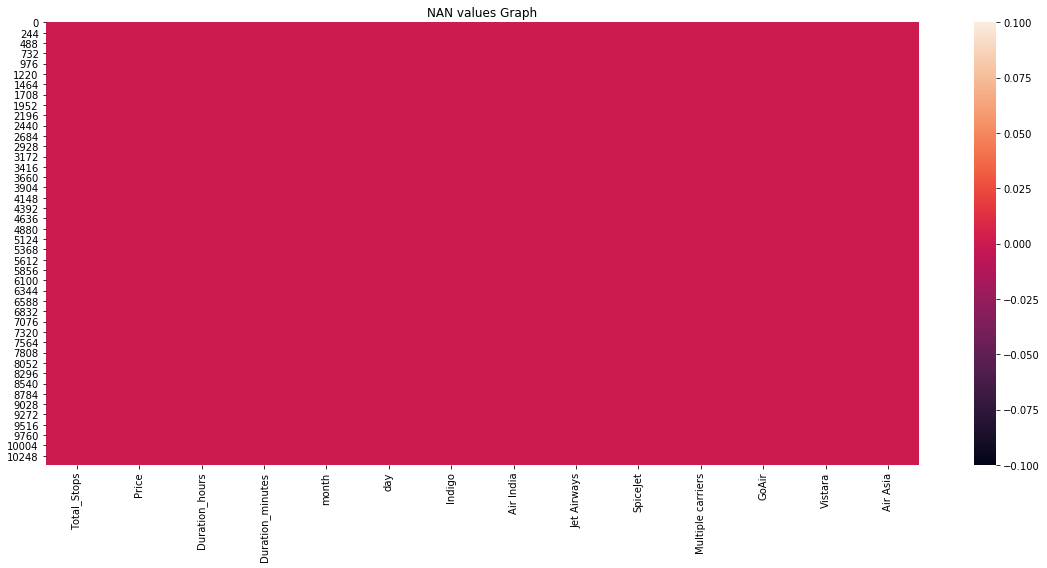

In [109]:
plt.figure(figsize=(16,8))
sns.heatmap(new_data.isna())
plt.title("NAN values Graph")
plt.tight_layout()

### All the surface of the heatmap is red and this means there is no missing value in our dataset. great.

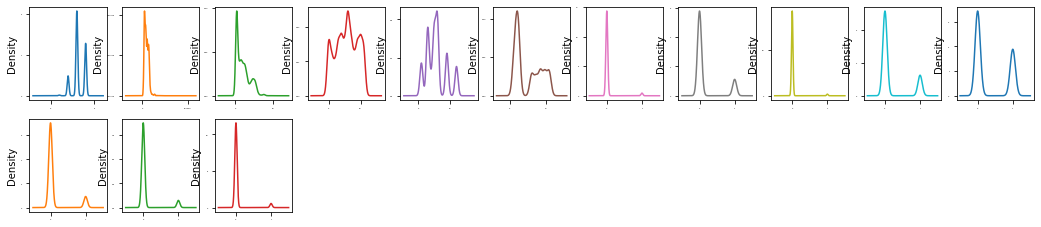

In [110]:
new_data.plot(kind='density',subplots=True,
          layout=(6,11),sharex=False,
          legend=False,fontsize='2',
          figsize =(18,12))
plt.show()

### From this density graph we can see that most the columns in the dataset have not normal distribution shape.

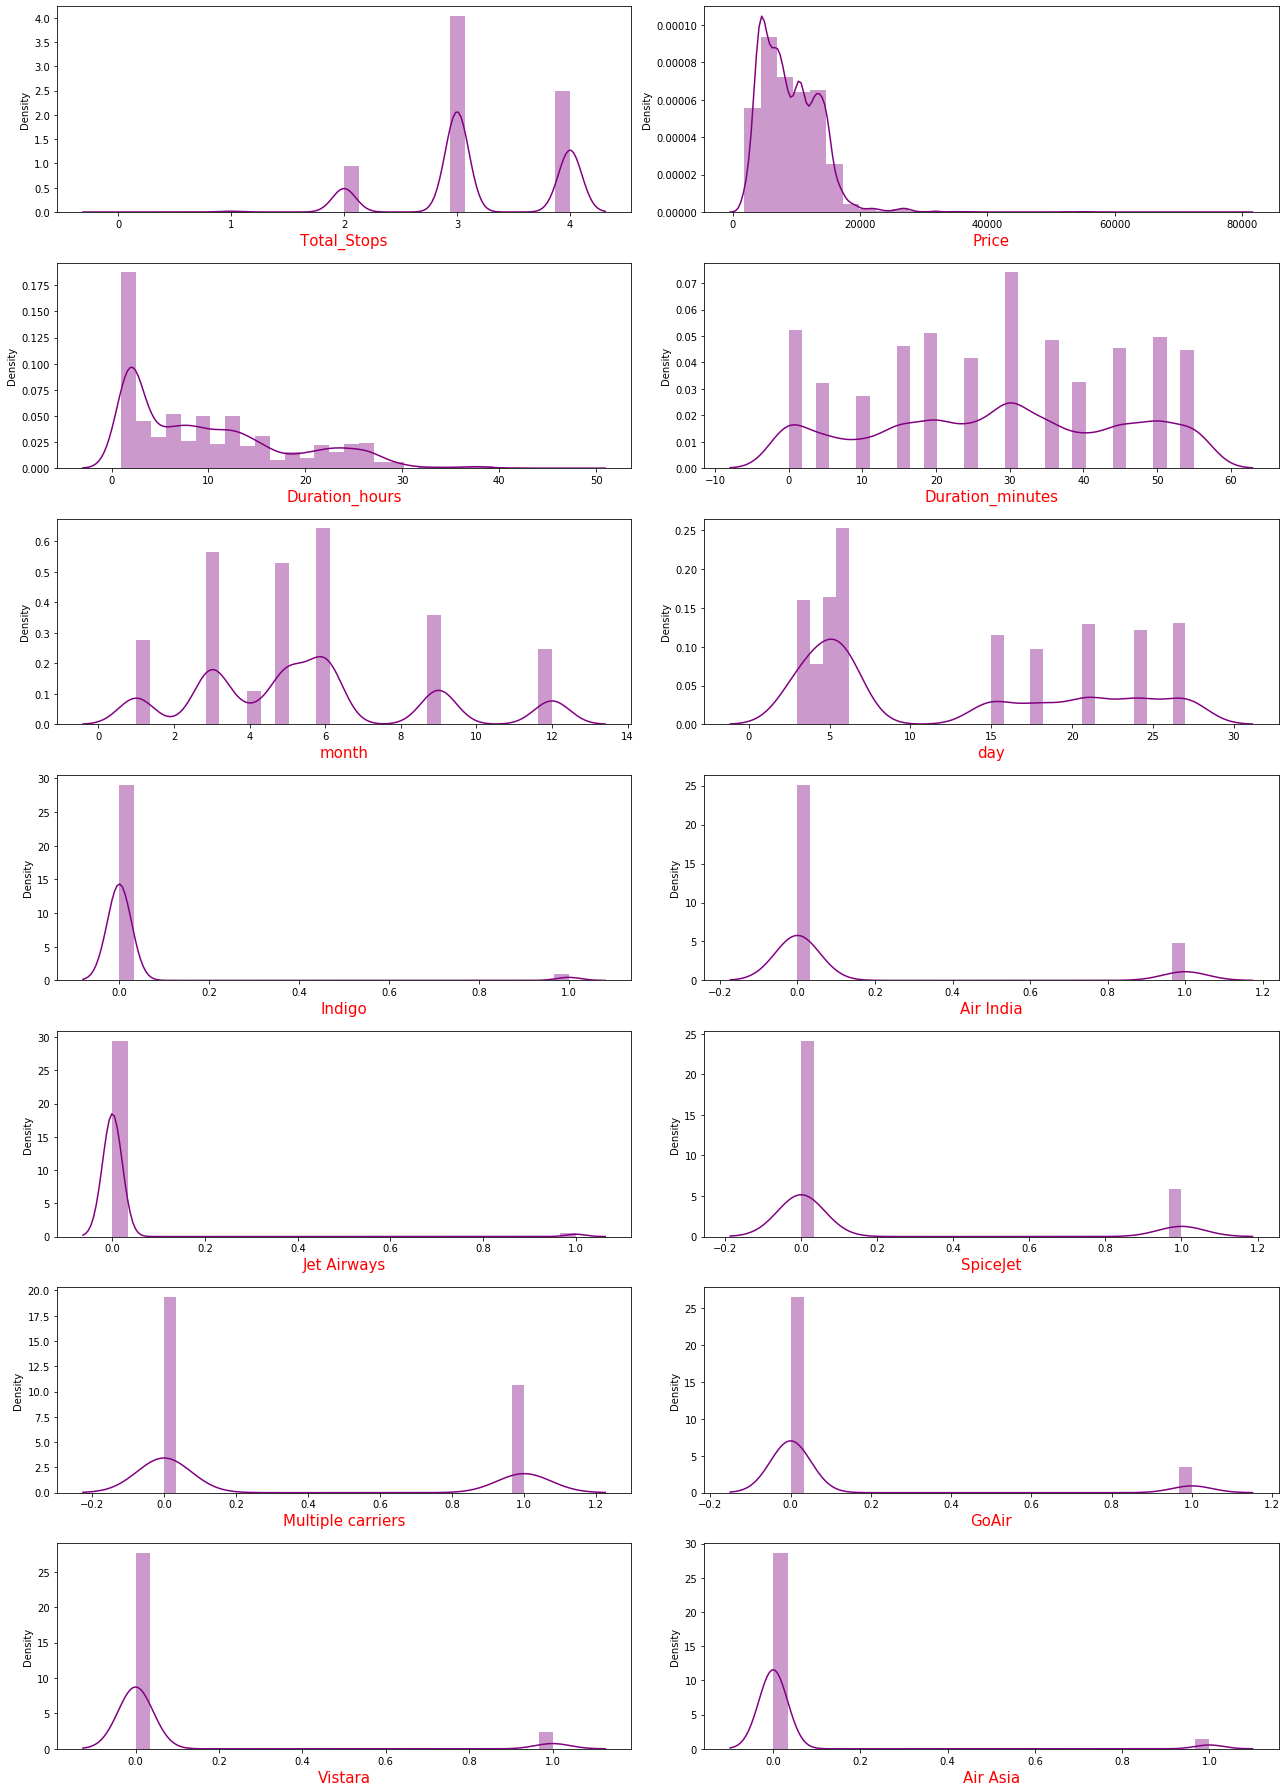

In [111]:
# plot a  distplot check the distribution

plt.figure(figsize=(18,25))
plotnumber = 1

for column in new_data:
    if plotnumber <= 14:
        ax = plt.subplot(7,2,plotnumber)
        sns.distplot(new_data[column],bins=30,color='purple')
        plt.xlabel(column,fontsize = 15,color='red')
    plotnumber+=1
plt.tight_layout()

### From distplot we can see that our data is not distributed normally for most of the columns since we can see a lot of skewness.

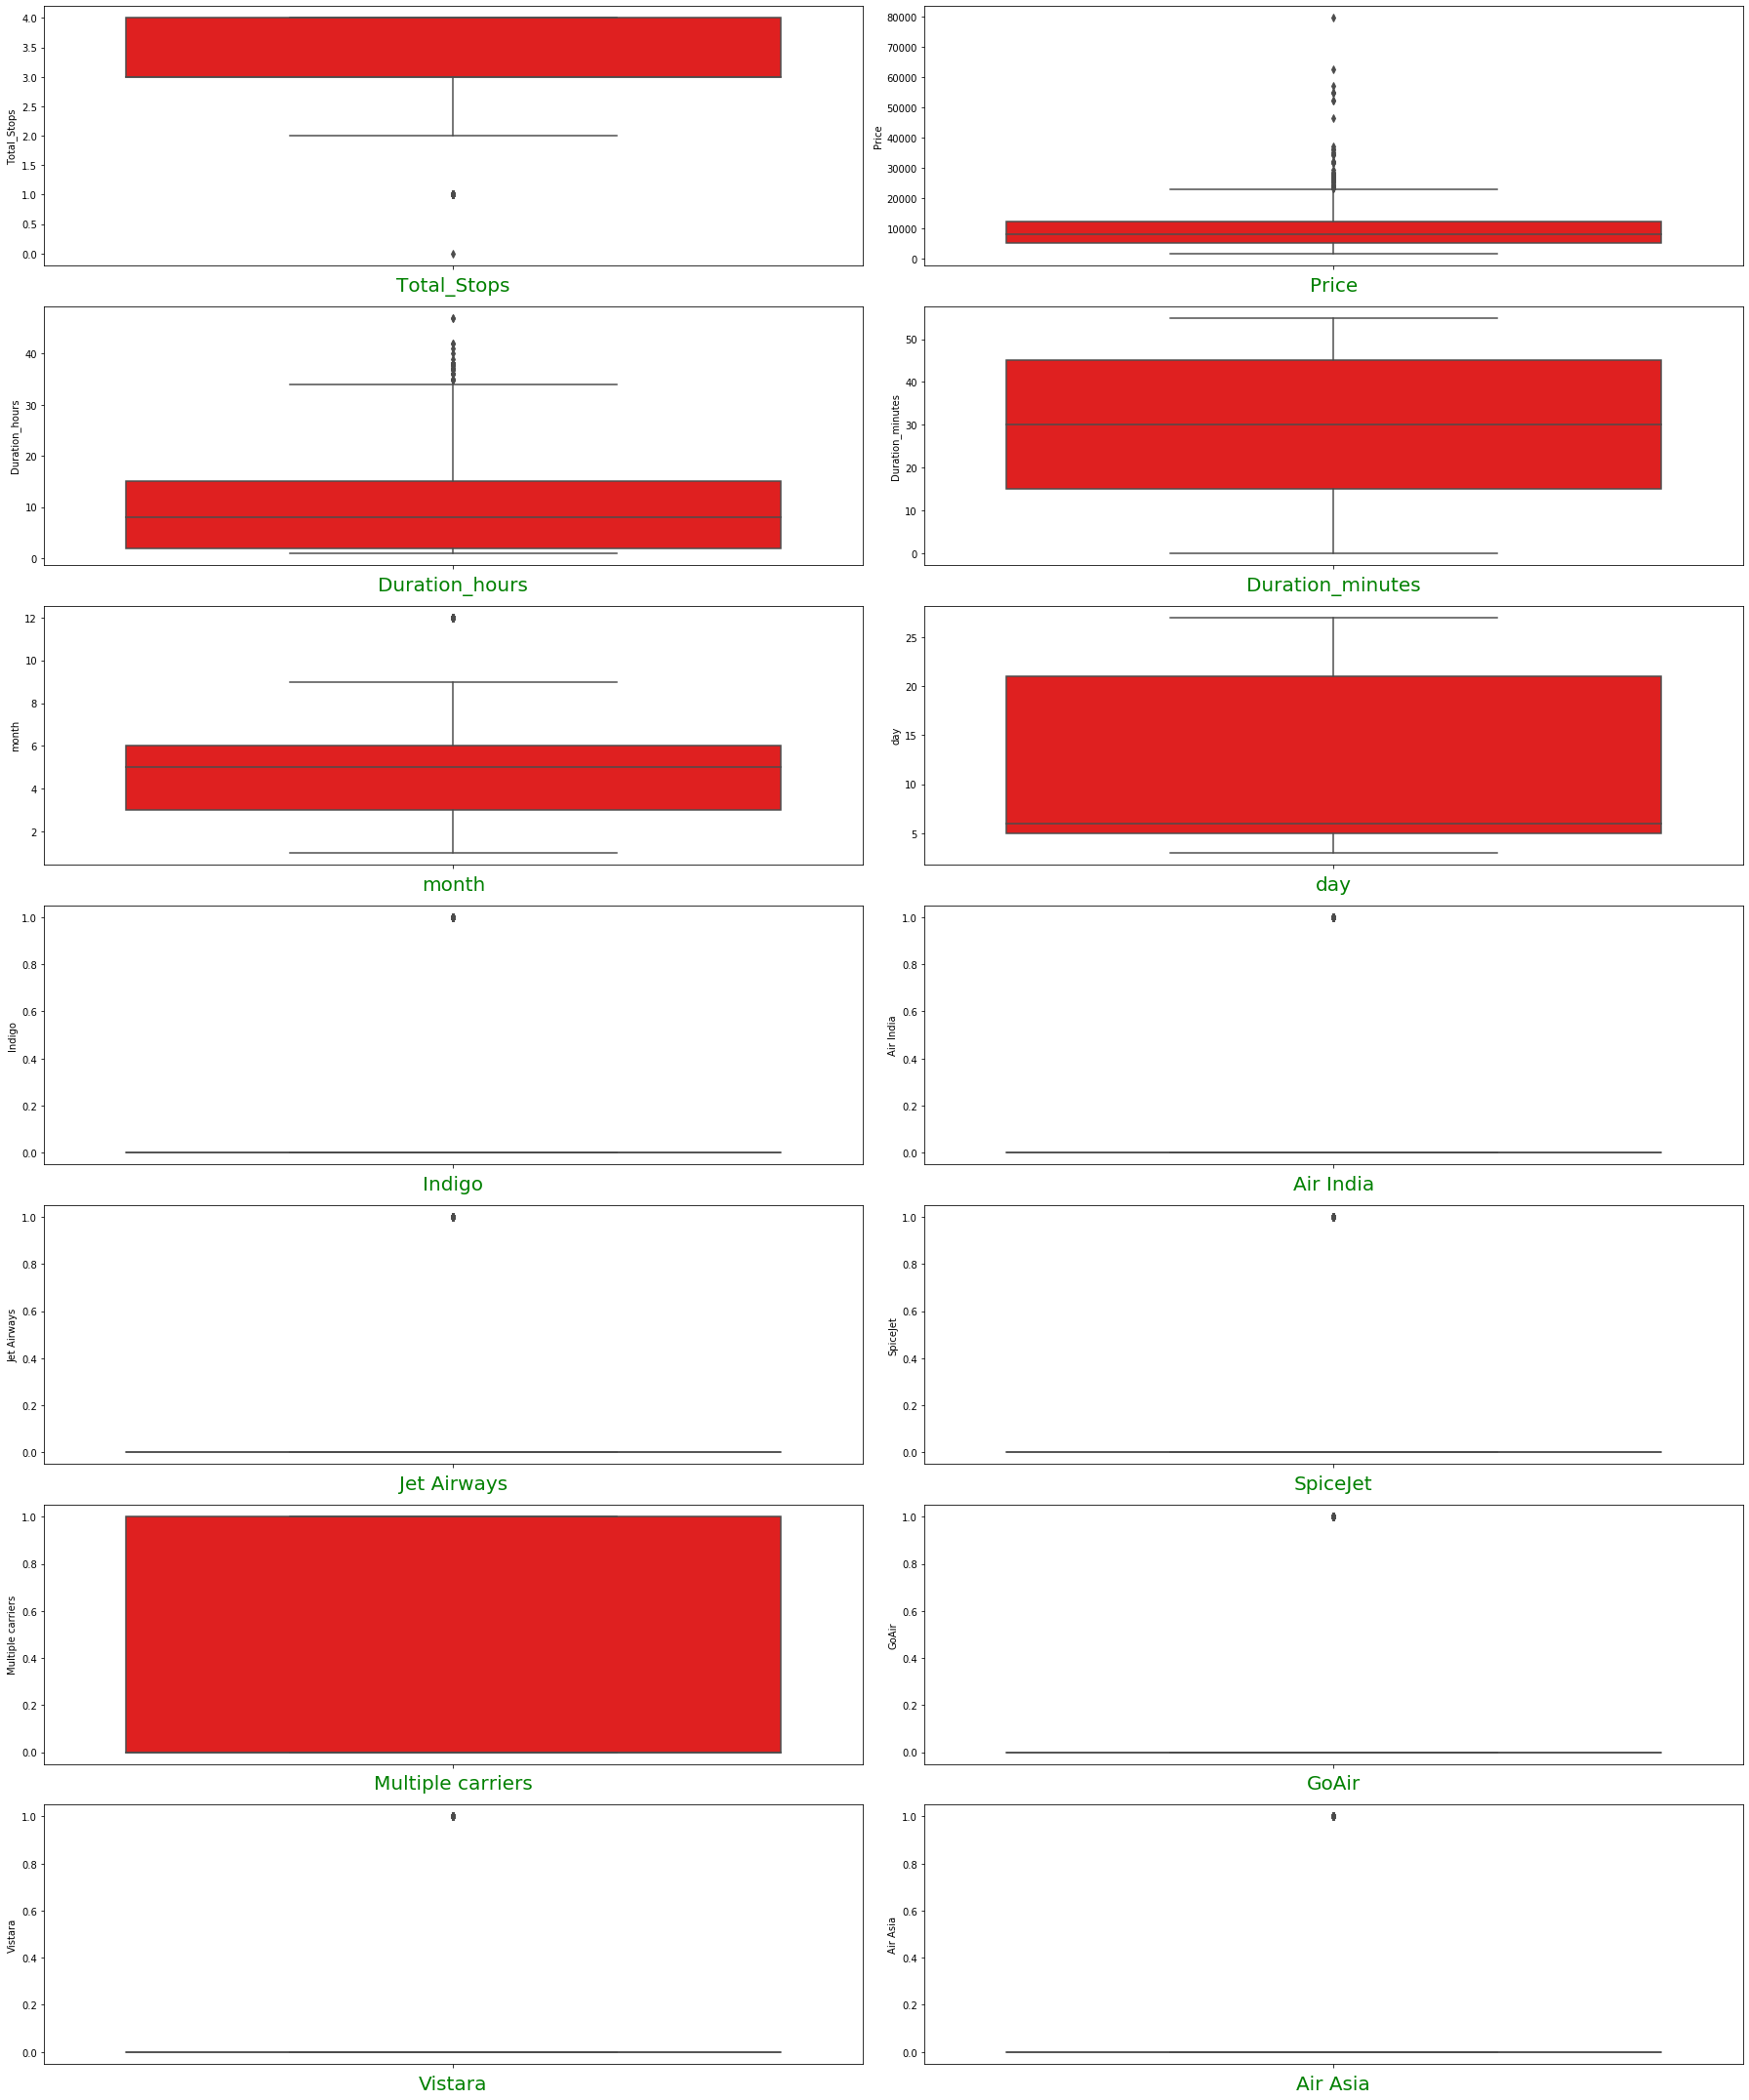

In [114]:
plt.figure(figsize=(25,30))
plotnumber = 1

for column in new_data:
    if plotnumber <= 14:
        ax = plt.subplot(7,2,plotnumber)
        sns.boxplot(y= new_data[column],color='red',orient='h')
        plt.xlabel(column,fontsize = 20,color='green')
    plotnumber+=1
plt.tight_layout()

### From the above boxplot graph we can see outliers in some columns, we will remove the Outliers the columns.

#### __Let's use the Quantiles techniques and see if we can remove them..__

## Outlier Dectection Formula

## Higher side ===> Q3 + (1.5 * IQR)
## lower side ===> Q1 - (1.5 * IQR)
## IQR = Inter Quantile Rate = Q3 - Q1

In [117]:
## Find the IQR ( Inter Quantile Range) to identify outlier

# 1st quantile
q1 = new_data.quantile(0.25)

# 3rd quantile
q3 = new_data.quantile(0.75)

#IQR 
iqr = q3 - q1

### __Will remove the outliers from the columns :"Total_Stops","Price","Duration_hours" and "month"__

#### __Removing the Outliers higher side__

In [119]:
high_Price = (q3.Price + (1.5 * iqr.Price))
high_Price

23022.75

### This means from the column "Price" all the records values greater than 23022.75 (Price > 23022.75) are Outliers.

In [121]:
## the get indexes of those records
indexes = np.where(new_data['Price'] > high_Price)
indexes

(array([  123,   396,   486,   510,   597,   628,   657,   784,   825,
          935,   945,   958,   974,  1194,  1244,  1339,  1420,  1462,
         1474,  1625,  1650,  1778,  1909,  2044,  2087,  2096,  2483,
         2543,  2604,  2621,  2677,  2904,  3010,  3088,  3231,  3372,
         3505,  3667,  3974,  4476,  4779,  4960,  5080,  5312,  5378,
         5597,  5636,  5645,  5654,  5673,  5680,  5789,  5916,  6240,
         6332,  6497,  6509,  6526,  6902,  7254,  7259,  7280,  7438,
         7455,  7516,  7609,  7620,  7650,  7795,  7910,  7968,  8326,
         8345,  8409,  8467,  8798,  8815,  8846,  8875,  9040,  9083,
         9457,  9538,  9787,  9864,  9922,  9967,  9989,  9995, 10149,
        10160, 10179, 10232, 10302]),)

In [122]:
## Let's drop indexes from the dataset

new_data= new_data.drop(new_data.index[indexes])

In [123]:
## reset the index
new_data.reset_index(drop=True)

,Total_Stops,Price,Duration_hours,Duration_minutes,month,day,Indigo,Air India,Jet Airways,SpiceJet,Multiple carriers,GoAir,Vistara,Air Asia
0,4,3897,2,50,3,24,0,0,0,1,0,0,0,0
1,2,7662,7,25,1,5,0,1,0,0,0,0,0,0
2,2,13882,19,0,9,6,0,0,0,0,1,0,0,0
3,3,6218,5,25,12,5,0,0,0,1,0,0,0,0
4,3,13302,4,45,1,3,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10364,4,4107,2,30,9,4,1,0,0,0,0,0,0,0
10365,4,4145,2,35,4,27,0,1,0,0,0,0,0,0
10366,4,7229,3,0,4,27,0,0,0,0,1,0,0,0
10367,4,12648,2,40,1,3,0,0,0,0,0,0,0,1


In [124]:
## "Duration_hours",column

indexes = np.where(new_data["Duration_hours"] > (q3.Duration_hours + (1.5 * iqr.Duration_hours)))
new_data= new_data.drop(new_data.index[indexes])

In [125]:
new_data.reset_index(drop=True)

,Total_Stops,Price,Duration_hours,Duration_minutes,month,day,Indigo,Air India,Jet Airways,SpiceJet,Multiple carriers,GoAir,Vistara,Air Asia
0,4,3897,2,50,3,24,0,0,0,1,0,0,0,0
1,2,7662,7,25,1,5,0,1,0,0,0,0,0,0
2,2,13882,19,0,9,6,0,0,0,0,1,0,0,0
3,3,6218,5,25,12,5,0,0,0,1,0,0,0,0
4,3,13302,4,45,1,3,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10298,4,4107,2,30,9,4,1,0,0,0,0,0,0,0
10299,4,4145,2,35,4,27,0,1,0,0,0,0,0,0
10300,4,7229,3,0,4,27,0,0,0,0,1,0,0,0
10301,4,12648,2,40,1,3,0,0,0,0,0,0,0,1


In [126]:
## "month",column

indexes = np.where(new_data["month"] > (q3.month + (1.5 * iqr.month)))
new_data= new_data.drop(new_data.index[indexes])

In [127]:
new_data.reset_index(drop=True)

,Total_Stops,Price,Duration_hours,Duration_minutes,month,day,Indigo,Air India,Jet Airways,SpiceJet,Multiple carriers,GoAir,Vistara,Air Asia
0,4,3897,2,50,3,24,0,0,0,1,0,0,0,0
1,2,7662,7,25,1,5,0,1,0,0,0,0,0,0
2,2,13882,19,0,9,6,0,0,0,0,1,0,0,0
3,3,13302,4,45,1,3,0,0,0,1,0,0,0,0
4,4,3873,2,25,6,24,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9358,4,4107,2,30,9,4,1,0,0,0,0,0,0,0
9359,4,4145,2,35,4,27,0,1,0,0,0,0,0,0
9360,4,7229,3,0,4,27,0,0,0,0,1,0,0,0
9361,4,12648,2,40,1,3,0,0,0,0,0,0,0,1


In [128]:
print("*"*40)

****************************************


### __Removing the Outliers of lower side in the column "Total_Stops"__

In [129]:
##  "Total_Stops",column

indexes = np.where(new_data["Total_Stops"] < (q3.Total_Stops - (1.5 * iqr.Total_Stops)))
new_data= new_data.drop(new_data.index[indexes])

In [130]:
new_data.reset_index(drop=True)

,Total_Stops,Price,Duration_hours,Duration_minutes,month,day,Indigo,Air India,Jet Airways,SpiceJet,Multiple carriers,GoAir,Vistara,Air Asia
0,4,3897,2,50,3,24,0,0,0,1,0,0,0,0
1,3,13302,4,45,1,3,0,0,0,1,0,0,0,0
2,4,3873,2,25,6,24,0,0,0,0,0,0,1,0
3,3,22270,21,5,1,3,0,0,0,0,1,0,0,0
4,3,8625,7,50,5,27,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8209,4,3257,2,40,5,21,0,0,0,0,0,0,1,0
8210,4,4107,2,30,9,4,1,0,0,0,0,0,0,0
8211,4,4145,2,35,4,27,0,1,0,0,0,0,0,0
8212,4,7229,3,0,4,27,0,0,0,0,1,0,0,0


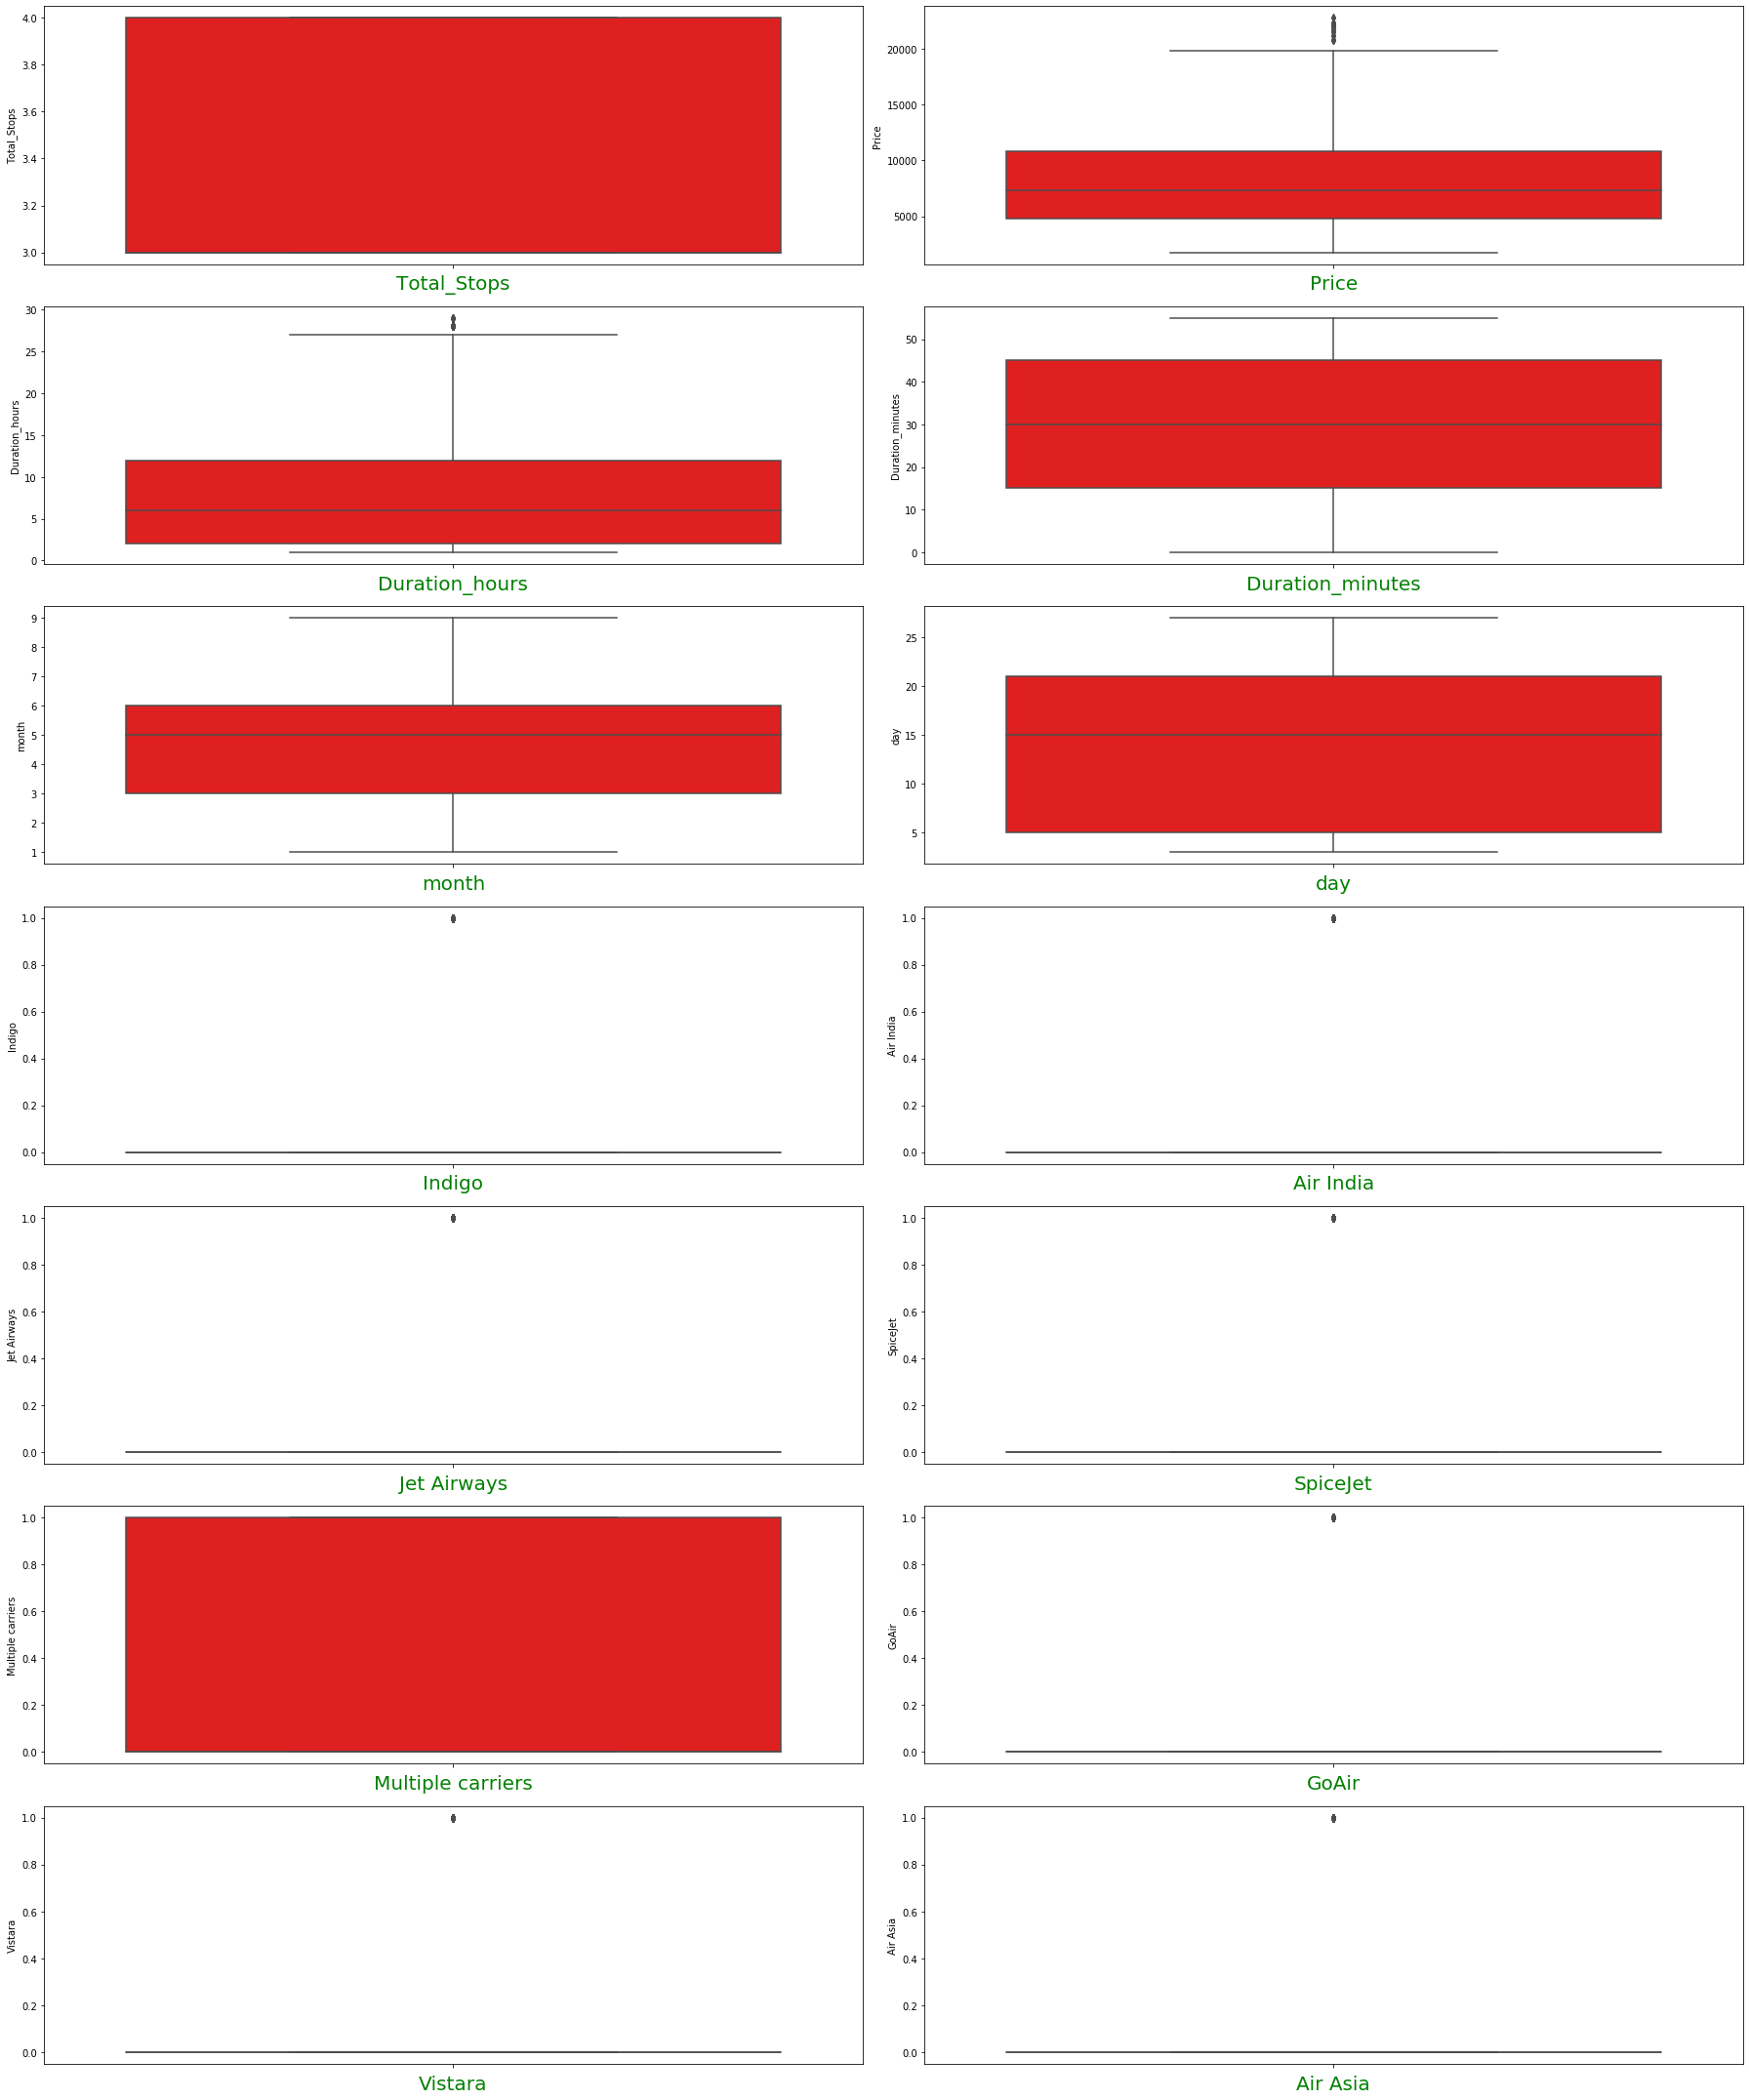

In [131]:
plt.figure(figsize=(25,30))
plotnumber = 1

for column in new_data:
    if plotnumber <= 14:
        ax = plt.subplot(7,2,plotnumber)
        sns.boxplot(y= new_data[column],color='red',orient='h')
        plt.xlabel(column,fontsize = 20,color='green')
    plotnumber+=1
plt.tight_layout()

### From the boxplot here we can say that our data look better than before after removing the previous outliers.

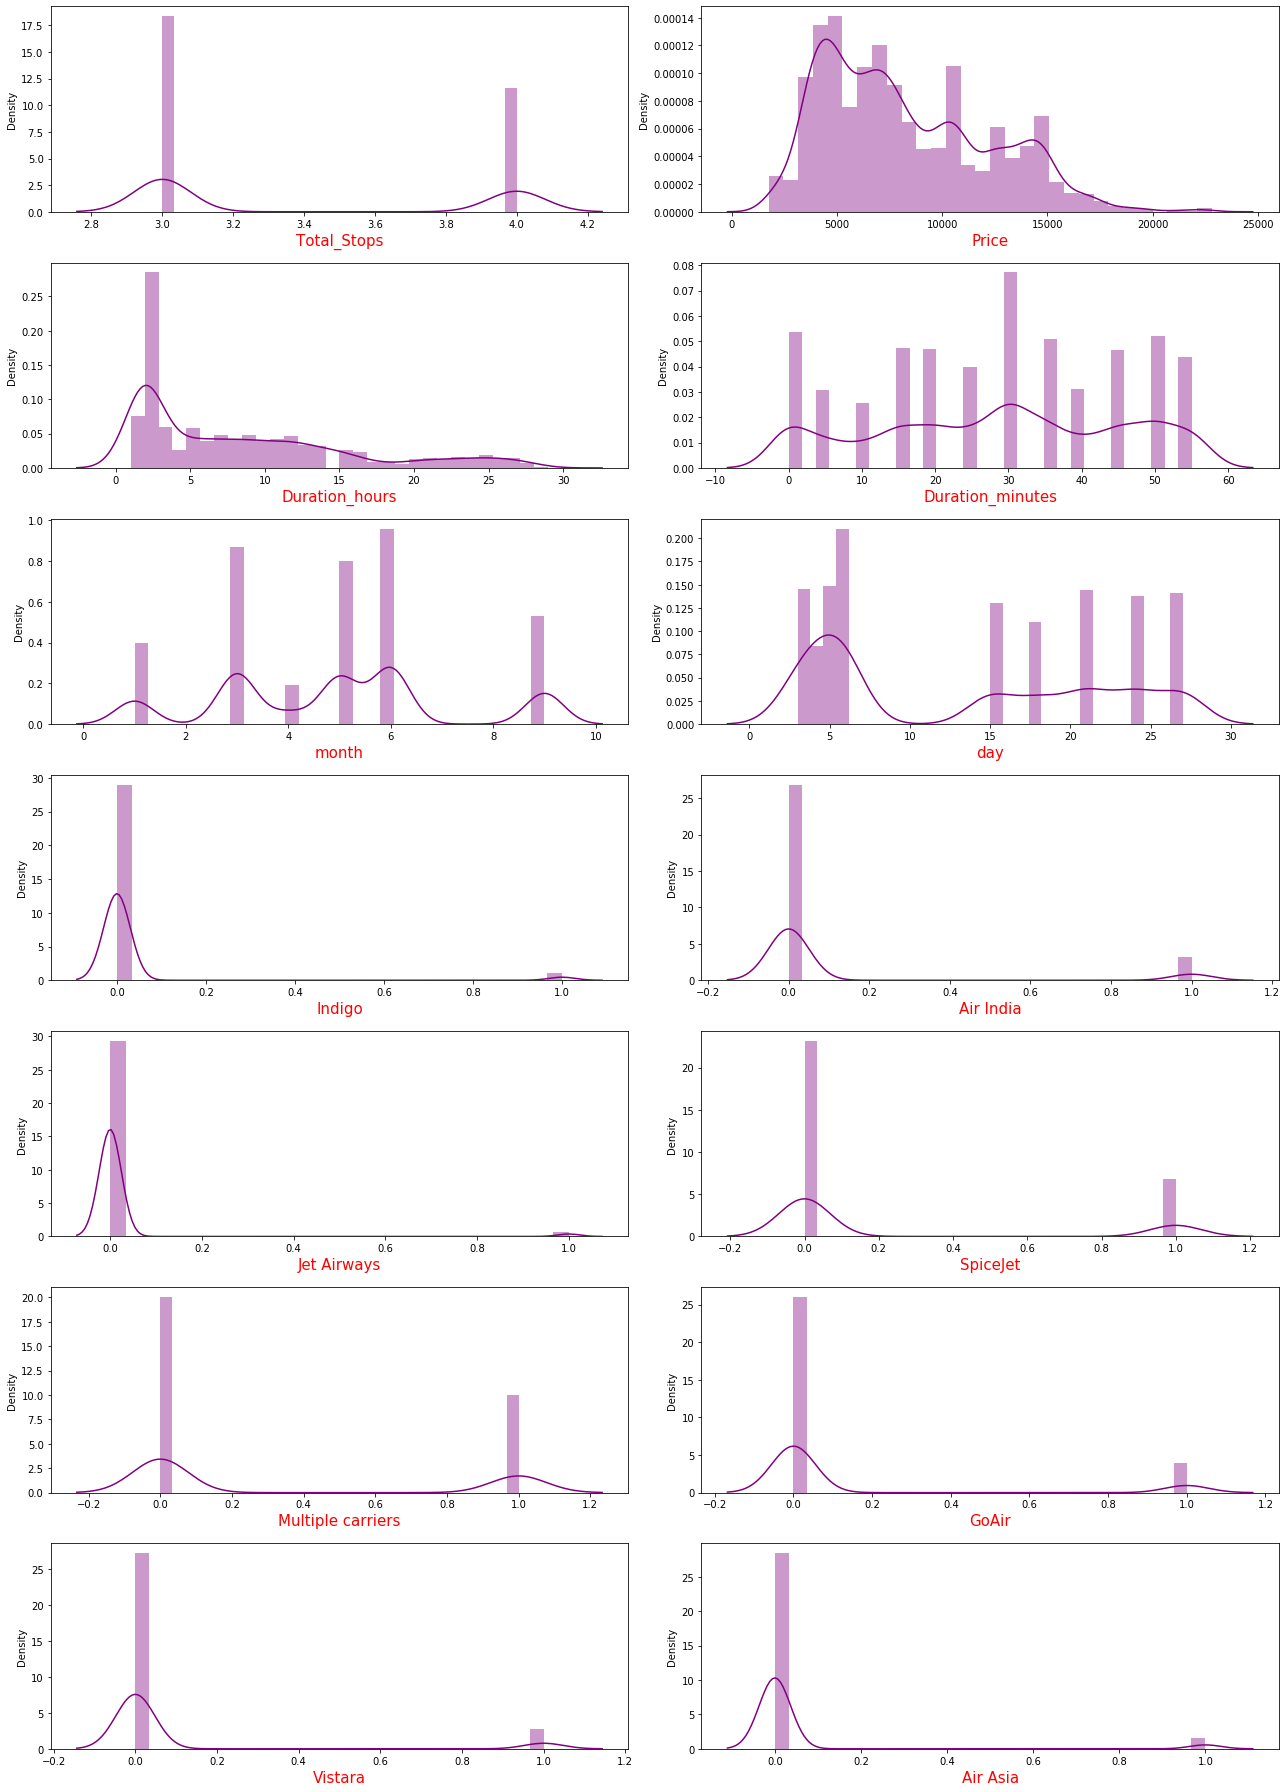

In [132]:
# plot a  distplot check the distribution

plt.figure(figsize=(18,25))
plotnumber = 1

for column in new_data:
    if plotnumber <= 14:
        ax = plt.subplot(7,2,plotnumber)
        sns.distplot(new_data[column],bins=30,color='purple')
        plt.xlabel(column,fontsize = 15,color='red')
    plotnumber+=1
plt.tight_layout()

### we can see that we have still more skewness in our dataset so let's remove them.

## __I will remove sknewness from features columns..__

#### __skewness removal__

In [133]:
## importing the libraries
from sklearn.preprocessing import PowerTransformer

In [134]:
pt=PowerTransformer(method='yeo-johnson')

In [135]:
features = new_data.drop('Price',axis=1)


In [136]:
X_power=pt.fit_transform(features)

In [137]:
X_power

array([[ 1.2565683 , -1.04855191,  1.20179769, ..., -0.39136403,
        -0.31930969, -0.23474661],
       [-0.79581826, -0.37927702,  0.95425537, ..., -0.39136403,
        -0.31930969, -0.23474661],
       [ 1.2565683 , -1.04855191, -0.10931643, ..., -0.39136403,
         3.13175586, -0.23474661],
       ...,
       [ 1.2565683 , -1.04855191,  0.43954947, ..., -0.39136403,
        -0.31930969, -0.23474661],
       [ 1.2565683 , -0.66825011, -1.875644  , ..., -0.39136403,
        -0.31930969, -0.23474661],
       [ 1.2565683 , -1.04855191,  0.70048918, ..., -0.39136403,
        -0.31930969,  4.25991234]])

In [138]:
df=pd.DataFrame(X_power,columns=features.columns)


In [139]:
df.head(4)

,Total_Stops,Duration_hours,Duration_minutes,month,day,Indigo,Air India,Jet Airways,SpiceJet,Multiple carriers,GoAir,Vistara,Air Asia
0,1.256568,-1.048552,1.201798,-0.800476,1.115991,-0.188553,-0.343522,-0.15053,1.840603,-0.705751,-0.391364,-0.319310,-0.234747
1,-0.795818,-0.379277,0.954255,-1.850780,-1.419354,-0.188553,-0.343522,-0.15053,1.840603,-0.705751,-0.391364,-0.319310,-0.234747
2,1.256568,-1.048552,-0.109316,0.526961,1.115991,-0.188553,-0.343522,-0.15053,-0.543300,-0.705751,-0.391364,3.131756,-0.234747
3,-0.795818,1.413090,-1.411505,-1.850780,-1.419354,-0.188553,-0.343522,-0.15053,-0.543300,1.416930,-0.391364,-0.319310,-0.234747


In [140]:
df.shape

(8214, 13)

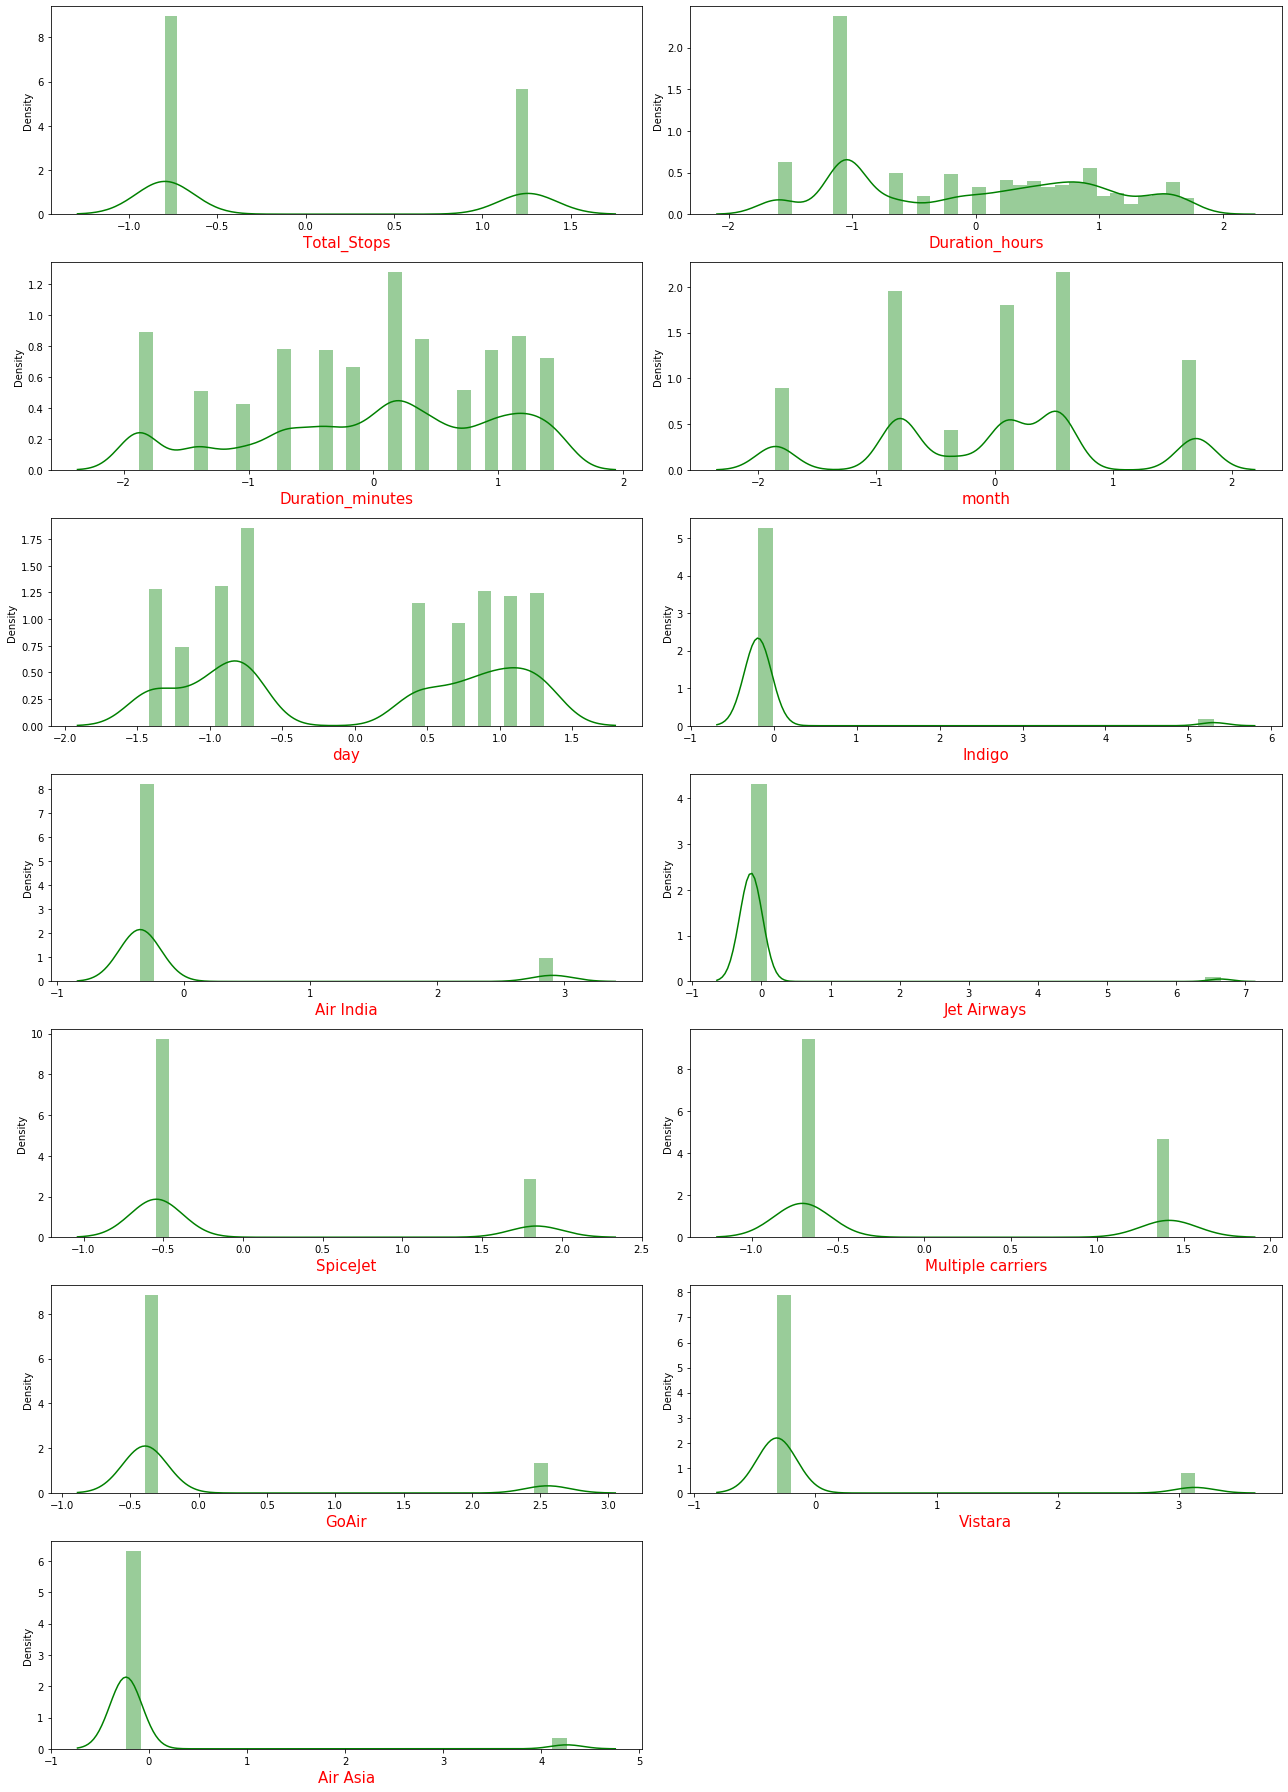

In [141]:
plt.figure(figsize=(18,25))
plotnumber = 1

for column in df:
    if plotnumber <= 13:
        ax = plt.subplot(7,2,plotnumber)
        sns.distplot(df[column],bins=30,color='green')
        plt.xlabel(column,fontsize = 15,color='red')
    plotnumber+=1
plt.tight_layout()

### From here can see that our data look better than before, and it has less kewness.


In [142]:
print("*"*50)
print("*"*50)

**************************************************
**************************************************


## __Before fit our data to the model ,let's see by visualize the relationship bw the features and the label "price"  usig scatter method.__

In [143]:
y = new_data.Price

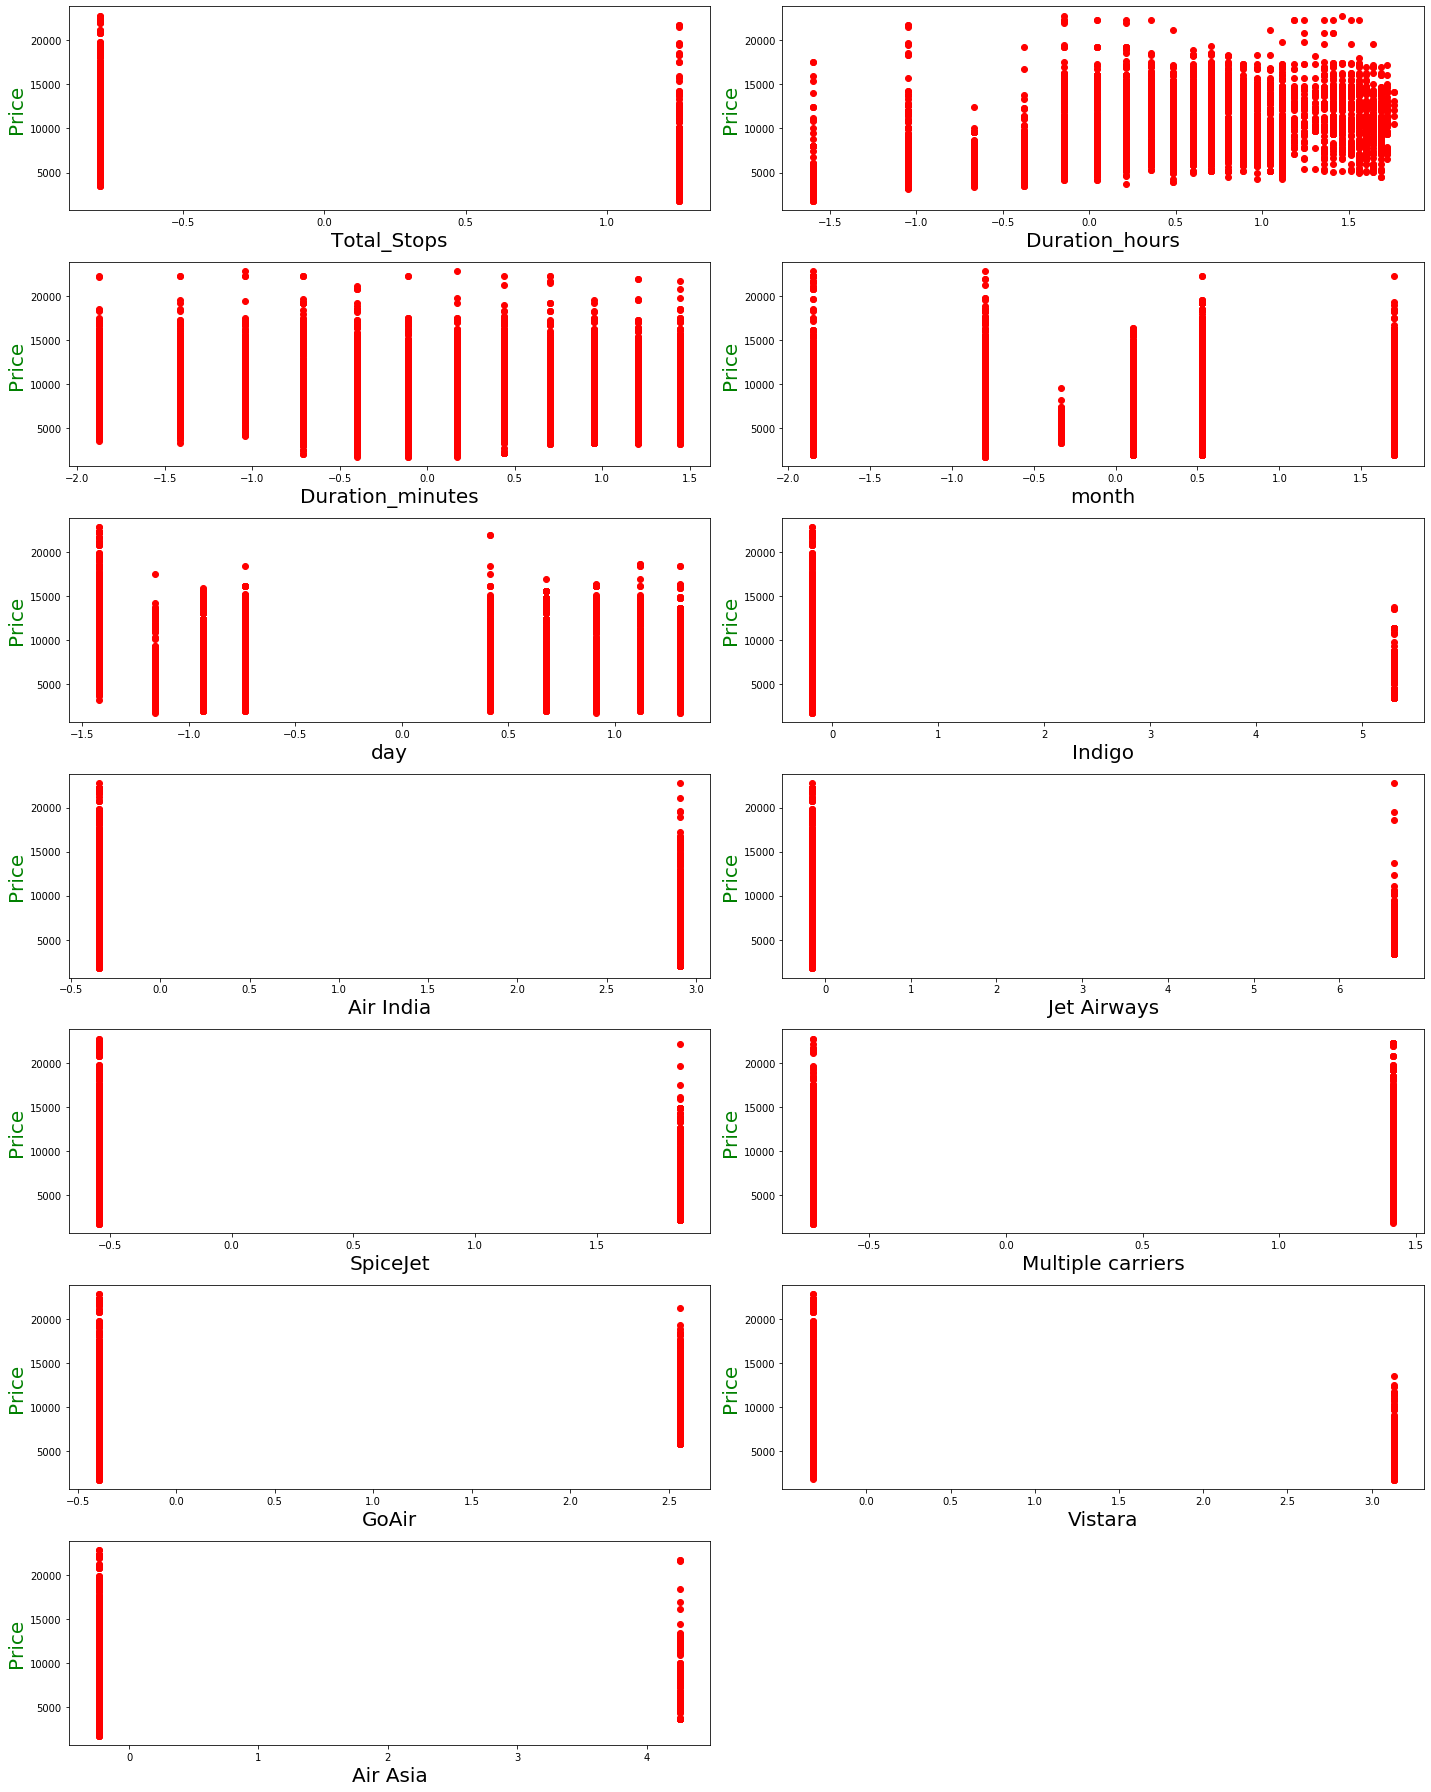

In [144]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber <= 13:
        ax = plt.subplot(7,2,plotnumber)
        plt.scatter(df[column],y, color ='red')
        plt.xlabel(column, fontsize = 20)
        plt.ylabel('Price', fontsize = 20,color='green' )
        
    plotnumber+=1
plt.tight_layout()

### From the above Scatter plot we can see that there great linear relationship between our features and the label price but not much stronger relationship. There we can say our above assumption is satisfied, it is a __Regression problem__.

In [146]:
## Importing the libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge,RidgeCV,Lasso,LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics


In [147]:
## Features standarization
scale = StandardScaler()
X_scaled = scale.fit_transform(df)

In [148]:
X_scaled

array([[ 1.2565683 , -1.04855191,  1.20179769, ..., -0.39136403,
        -0.31930969, -0.23474661],
       [-0.79581826, -0.37927702,  0.95425537, ..., -0.39136403,
        -0.31930969, -0.23474661],
       [ 1.2565683 , -1.04855191, -0.10931643, ..., -0.39136403,
         3.13175586, -0.23474661],
       ...,
       [ 1.2565683 , -1.04855191,  0.43954947, ..., -0.39136403,
        -0.31930969, -0.23474661],
       [ 1.2565683 , -0.66825011, -1.875644  , ..., -0.39136403,
        -0.31930969, -0.23474661],
       [ 1.2565683 , -1.04855191,  0.70048918, ..., -0.39136403,
        -0.31930969,  4.25991234]])

In [164]:
##  let's build the model with this random state

x_train, x_test, y_train,y_test = train_test_split(X_scaled,y,
                                                    test_size=30,
                                                    random_state=99)

Lr = LinearRegression()
Lr.fit(x_train, y_train)

LinearRegression()

In [165]:
y_lr_pred = Lr.predict(x_test)

In [166]:
print('*****Accuracy ****\n')
print(metrics.r2_score(y_test,y_lr_pred))

*****Accuracy ****

0.6762890427659581


In [167]:
### let's check the mean_absolute_error

MAE = mean_absolute_error(y_test,y_lr_pred)
print(MAE)

1820.0333548756207


In [168]:
## let's also verify the score
score = Lr.score(x_test,y_test)
print(score)

0.6762890427659581


In [169]:
## Models evaluation using Mean Square Error (MSE)

print('\nThe Mean Square Erro of LinearRegression model is:',mean_squared_error(y_test,y_lr_pred))


The Mean Square Erro of LinearRegression model is: 6818217.389876979


## __The r2_score 67% is not bad  and also the errors size is too high so let's build more models see which one fit better for our dataset...__

In [174]:
### instantiate the models

dtr = DecisionTreeRegressor(random_state=99)
ada = AdaBoostRegressor(random_state=99)
rid = Ridge(random_state=99)
las = Lasso(random_state=99)
rfr = RandomForestRegressor(random_state=99)

In [175]:
dtr.fit(x_train,y_train)
ada.fit(x_train,y_train)
rid.fit(x_train,y_train)
las.fit(x_train,y_train)
rfr.fit(x_train,y_train)
print('Models are accessfully fitted.!!!')

Models are accessfully fitted.!!!


In [176]:
dt_ypred = dtr.predict(x_test)
ada_ypred = ada.predict(x_test)
rid_ypred = rid.predict(x_test)
las_ypred = las.predict(x_test)
rfr_pred = rfr.predict(x_test)
print('Models are accessfully predicted.!!!')

Models are accessfully predicted.!!!


### __Models Evaluation__

In [177]:
## Models evaluation using Mean Absolute Erro

dt_mae  = mean_absolute_error(y_test,dt_ypred)
ada_mae = mean_absolute_error(y_test,ada_ypred)
rid_mae = mean_absolute_error(y_test,rid_ypred)
las_mae = mean_absolute_error(y_test,las_ypred)
rfr_mae = mean_absolute_error(y_test,rfr_pred)

print('\n','-'*50)
print('\nThe Mean Absolute Erro of DecisionTreeRegressor model is:',dt_mae )
print('\n','-'*50)
print('\nThe Mean Absolute Erro of AdaBoostRegressor model is:',ada_mae)
print('\n','-'*50)
print('\nThe Mean Absolute Erro of Ridge model is:',rid_mae)
print('\n','-'*50)
print('\nThe Mean Absolute Erro of Lasso model is:',las_mae)
print('\n','-'*50)
print('\nThe Mean Absolute Erro of RandomForestRegressor model is:',rfr_mae)


 --------------------------------------------------

The Mean Absolute Erro of DecisionTreeRegressor model is: 1674.6444444444444

 --------------------------------------------------

The Mean Absolute Erro of AdaBoostRegressor model is: 2140.320775900443

 --------------------------------------------------

The Mean Absolute Erro of Ridge model is: 1821.1493836490565

 --------------------------------------------------

The Mean Absolute Erro of Lasso model is: 1820.7101885146535

 --------------------------------------------------

The Mean Absolute Erro of RandomForestRegressor model is: 1271.342535714285


## __From the above verification we can see that RandomForestRegressor model :MAE =1271 and RandomForestRegressor model MAE=1271 fit better our data.__

In [178]:
## Models evaluation using Mean Square Error (MSE)

print('\nThe Mean Square Erro of DecisionTreeRegressor model is:',mean_squared_error(y_test,dt_ypred))
print('\n','-'*50)
print('\nThe Mean Square Erro of AdaBoostRegressor model is:',mean_squared_error(y_test,ada_ypred))
print('\n','-'*50)
print('\nThe Mean Square Erro of Ridge model is:',mean_squared_error(y_test,rid_ypred))
print('\n','-'*50)
print('\nThe Mean Square Erro of Lasso model is:',mean_squared_error(y_test,las_ypred))
print('\n','-'*50)
print('\nThe Mean Square Erro of RandomForestRegressor model is:',mean_squared_error(y_test,rfr_pred))


The Mean Square Erro of DecisionTreeRegressor model is: 6233596.677777778

 --------------------------------------------------

The Mean Square Erro of AdaBoostRegressor model is: 6112213.928106705

 --------------------------------------------------

The Mean Square Erro of Ridge model is: 6812200.260407393

 --------------------------------------------------

The Mean Square Erro of Lasso model is: 6811212.202209472

 --------------------------------------------------

The Mean Square Erro of RandomForestRegressor model is: 3627425.2139715226


### __From the above verification we can see that RandomForestRegressor model :MSE =3627425 and RandomForestRegressor model MSE=3627425 fit better our data__

In [179]:
### checking the accuray of each modeel.

print('*****Accuracy of DecisionTreeRegressor model is: ****\n')
print(metrics.r2_score(y_test,dt_ypred))
print('\n','-'*50)
print('*****Accuracy of AdaBoostRegressor model is: ****\n')
print(metrics.r2_score(y_test,ada_ypred))
print('\n','-'*50)
print('*****Accuracy of Ridge model is: ****\n')
print(metrics.r2_score(y_test,rid_ypred))
print('\n','-'*50)
print('*****Accuracy of Lasso model is: ****\n')
print(metrics.r2_score(y_test,las_ypred))
print('\n','-'*50)
print('*****Accuracy of RandomForestRegressor model is: ****\n')
print(metrics.r2_score(y_test,rfr_pred))
print('\n','-'*50)

*****Accuracy of DecisionTreeRegressor model is: ****

0.7040452904053275

 --------------------------------------------------
*****Accuracy of AdaBoostRegressor model is: ****

0.7098082228319265

 --------------------------------------------------
*****Accuracy of Ridge model is: ****

0.6765747201841192

 --------------------------------------------------
*****Accuracy of Lasso model is: ****

0.6766216305782535

 --------------------------------------------------
*****Accuracy of RandomForestRegressor model is: ****

0.8277794295539751

 --------------------------------------------------


### From all verification , we can conclude that __RandomForestRegressor(rfr)__ model is our best model since it has the less __errors(MAE, MSE)__ and also has the higest __accuracy = r2_score = 82%__

Text(0.5, 1.0, 'Actual VS Predicted')

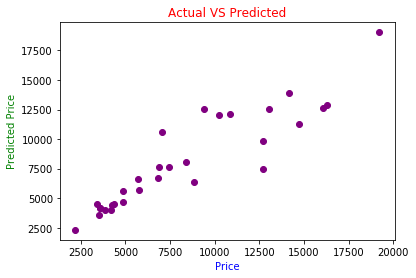

In [180]:
### let's plot the actual value and the predicted values and check how it look

plt.scatter(y_test,rfr_pred,color ='purple')
plt.xlabel('Price',color='blue')
plt.ylabel('Predicted Price',color='green')
plt.title('Actual VS Predicted',color='r')

### From above scatter plot we can say that our best model draw a great linear relationshipe with the dataset.

## __Hyper parameter Tuning (HPT)__

In [191]:
### importing the libraries
from sklearn.model_selection import GridSearchCV


In [190]:
grid_param1 = {
    'criterion':['mse', 'mae'],
    'max_depth':range(2,10,3),
    'min_samples_leaf':range(1,10,2),
    'min_samples_split':range(2,10,2),
    'max_features':["auto", "sqrt", "log2"]
    }


In [192]:
grid_search1 = GridSearchCV(estimator=rfr,
                         param_grid=grid_param1,
                         cv=5,n_jobs=-1)

In [193]:
## again train the model

grid_search1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=99), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': range(2, 10, 3),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2)})

In [194]:
# best parameters

best_parameters = grid_search1.best_params_
print(best_parameters)

{'criterion': 'mse', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6}


### __Now we got the best paramters__

In [195]:
## so let's build again the decisionTreeRegressor model

rfr_model = RandomForestRegressor(criterion='mse',
                            max_depth=8,
                            max_features= 'auto',
                            min_samples_leaf=1,
                            min_samples_split=6,random_state=99)

In [196]:
## let's fit gain the model with the data

rfr_model.fit(x_train,y_train)
pred_drfr = rfr_model.predict(x_test)

print("\n=============Test Result==============")

print(f"Accuracy :{metrics.r2_score(y_test,pred_drfr)*100:.2f}%")
print("_____________________________________________")


=============Test Result==============
Accuracy :86.79%
_____________________________________________


### __Great we are getting good a Accuracy , from 82% to 86% Accuraryc.__!!!

## __Conclusion: our best model is RandomForestRegressor(rfr_model) withe accuracy = 86%.__

In [197]:
print("*"*45)
print("*"*45)

*********************************************
*********************************************


### __model saving__

In [198]:
import joblib

In [199]:
joblib.dump(rfr_model,'flight_price_prediction_model.pkl')

['flight_price_prediction_model.pkl']

In [200]:
print("*"*45)

*********************************************


### __Now let's load the saved model "flight_price_prediction_model" and make prediction using the test data.__

In [201]:
## loading the model.

my_model = joblib.load('flight_price_prediction_model.pkl')

In [203]:
## importing the cleaned text data 

test_data = pd.read_csv('Cleaned_Test_data.csv')

In [204]:
test_data.head(2)

,Total_Stops,Duration_hours,Duration_minutes,month,day,IndiGo,Air India,Jet Airways,SpiceJet,Multiple carriers,GoAir,Vistara,Air Asia
0,3,10,55,6,6,0,0,0,0,1,0,0,0
1,3,4,0,12,5,0,0,0,1,0,0,0,0


In [207]:
## let's make the prediction

predict = my_model.predict(test_data)

In [215]:
## converting the result into a DataFrame

result_data = pd.DataFrame(predict,columns=['Price'])

In [216]:
## let'see the first 4 record.

result_data.head(4)

,Price
0,10281.919859
1,6658.424760
2,10281.919859
3,6681.710561


In [217]:
## checking the shape

result_data.shape

(2645, 1)

In [218]:
### finally let's save the prediction  result into .csv file

result_data.to_csv('Prediction_result_data.csv',index=False)

In [219]:
print("*"*45)

*********************************************


# __END OF THE PROJECT, THANK YOU!__